In [37]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import math

In [38]:
dataset = [2, 4, 7 ,8]
N = 15

In [39]:
print(f"Choose a number from {dataset}:")
a = int(input())

Choose a number from [2, 4, 7, 8]:


In [40]:
if a not in dataset:
    print(f"Error: '{a}' not in {dataset}.")
    exit()
if math.gcd(a, N) != 1:
    print(f"Error: {a} is not coprime with {N}.")
    exit()

In [ ]:
n_count = 4
n_work = 4
qc = QuantumCircuit(n_count + n_work, n_count)

In [51]:
for q in range(n_count):
    qc.h(q)

In [ ]:
for q in range(n_count):
    power = 2 ** q
    if a == 2:
        qc.cx(q, n_count + (power % 4))
    elif a == 4:
        qc.cx(q, n_count + ((power * 2) % 4))
    elif a == 7:
        for _ in range(power % 4):
            qc.cx(q, n_count)
            qc.cx(q, n_count + 1)
            qc.ccx(q, n_count, n_count + 2)
            qc.ccx(q, n_count + 1, n_count + 3)
    elif a == 8:
        qc.cx(q, n_count + ((power * 3) % 4))

In [ ]:
for i in range(n_count):
    for j in range(i):
        qc.cp(-math.pi / float(2 ** (i - j)), j, i)
    qc.h(i)


In [ ]:
qc.measure(range(n_count), range(n_count))

In [ ]:
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

In [ ]:
periods = []
for state in counts:
    measured = int(state, 2)
    if measured == 0:
        continue
    for r in range(1, 2 ** n_count):
        if any(abs((measured / (2 ** n_count)) - (k / r)) < 1 / (2 ** n_count) for k in range(r)):
            periods.append(r)
            break

In [ ]:
factors = set()
for r in periods:
    if r % 2 == 0 and r != 0:
        plus = math.gcd(a ** (r // 2) + 1, N)
        minus = math.gcd(a ** (r // 2) - 1, N)
        if plus != 1 and plus != N:
            factors.add(plus)
        if minus != 1 and minus != N:
            factors.add(minus)


In [ ]:
print(f"Input a: {a}")
print(f"Possible period(s): {periods}")
print(f"Factors of {N}: {factors}")

Input a: 7
Possible period(s): [8, 16]
Factors of 15: set()


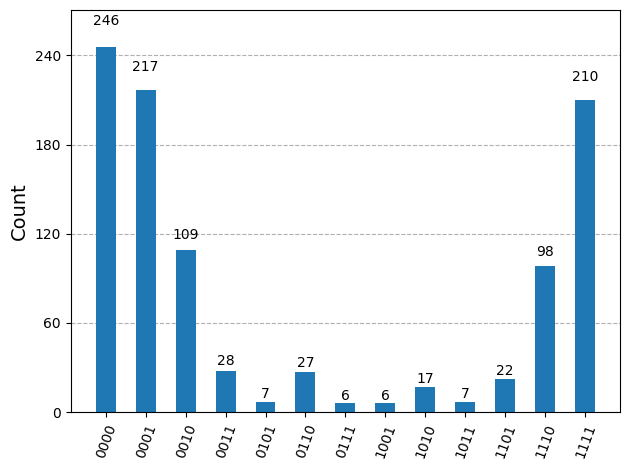

In [50]:
plot_histogram(counts)